In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float
    bmi_label: str

In [7]:
def calcualte_bmi(state: BMIState) -> BMIState:
    bmi = state["weight"] / (state["height"] ** 2)
    state["bmi"] = round(bmi, 2)
    return state

In [13]:
def lebel_bmi(state: BMIState) -> BMIState:
    bmi = state["bmi"]
    if bmi < 18.5:
        label = "Underweight"
    elif 18.5 <= bmi < 24.9:
        label = "Normal weight"
    elif 25 <= bmi < 29.9:
        label = "Overweight"
    else:
        label = "Obesity"
    state["bmi_label"] = label
    return state

In [16]:
# Define the state graph
graph = StateGraph(BMIState)
# Add nodes
graph.add_node("Calculate BMI", calcualte_bmi)
graph.add_node("Lebel BMI", lebel_bmi)
# Add edges
graph.add_edge(START, "Calculate BMI")
graph.add_edge("Calculate BMI", "Lebel BMI")
graph.add_edge("Lebel BMI", END)

# Compile the graph
workflow = graph.compile()

# graph invoke
intial_state = {"weight": 70, "height": 1.75}
final_state = workflow.invoke(intial_state)
print(final_state)


{'weight': 70, 'height': 1.75, 'bmi': 22.86}


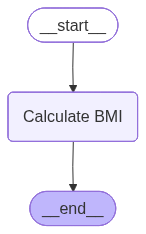

In [12]:
# display the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())